In [1]:
#In this notebook we try to practice all the classification algorithms that we learned in this course.

#We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

#Lets first load required libraries:


import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:

#Load Data From CSV File
#Let's load the dataset [NB Need to provide link to csv file]


df = pd.read_excel(r'C:\Users\djina\OneDrive\Documentos\Data Science\Becars\VENDIDOS1MESHISTORICOml.xlsx')

df.head()


,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,...,mes,year,MATRICULA,CTE.GARANTÍA,CTE..PREPARACIÓN,CTE.TOTAL,BF.NETO,GARANTIA,MESES,GARANTIA2
0,RENAULT MEGANE,1.6,MANUAL,75,GASOLINA,NaN,G.COSTA,10,NaN,956.6,...,1,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VOLVO S60,2.5,MANUAL,145,GASOLINA,NaN,PARTICULAR,7,NaN,7900.0,...,2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VOLKSWAGEN PASSAT,1.9,MANUAL,130,DIESEL,NaN,LEASEPLAN,5,NaN,11200.0,...,2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SEAT TOLEDO,1.9,MANUAL,110,DIESEL,NaN,LEASEPLAN,5,NaN,7300.0,...,3,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKODA OCTAVIA,1.9,MANUAL,105,DIESEL,NaN,LEASEPLAN,3,NaN,10000.0,...,3,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

df.shape

(375, 35)

In [4]:
df.shape

(375, 35)

In [5]:
# We wan to know of total GARANTIA 2 which are good or MESES with value to 1
df[(df.GARANTIA==2) & (df.MESES==1.0)].shape

(16, 35)

In [6]:
df3=df[(df.GARANTIA==2)]
df3.shape
Accuracygarangtia2=13/28
Accuracygarangtia2

0.4642857142857143

In [7]:
#Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
df.drop(['GARANTIA','BF.NETO','CTE.TOTAL','CTE.GARANTÍA','MATRICULA','edad','sexo','nacionalidad','pais','provincia','localidad','C.P','C AUTO1','NETO','mes'], axis = 'columns', inplace=True)

In [8]:
#Feature after One Hot Encoding
df.head()

,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,BRUTO,KM,tipo,llantas,year,CTE..PREPARACIÓN,MESES,GARANTIA2
0,RENAULT MEGANE,1.6,MANUAL,75,GASOLINA,NaN,G.COSTA,10,NaN,956.6,956.6,4500,3543.4,109988,med,si,2008,NaN,NaN,NaN
1,VOLVO S60,2.5,MANUAL,145,GASOLINA,NaN,PARTICULAR,7,NaN,7900.0,7900.0,10500,2600.0,185390,gra,si,2008,NaN,NaN,NaN
2,VOLKSWAGEN PASSAT,1.9,MANUAL,130,DIESEL,NaN,LEASEPLAN,5,NaN,11200.0,11200.0,15750,4550.0,73790,gra,si,2008,NaN,NaN,NaN
3,SEAT TOLEDO,1.9,MANUAL,110,DIESEL,NaN,LEASEPLAN,5,NaN,7300.0,7300.0,9900,2600.0,97257,gra,si,2008,NaN,NaN,NaN
4,SKODA OCTAVIA,1.9,MANUAL,105,DIESEL,NaN,LEASEPLAN,3,NaN,10000.0,10000.0,12600,2600.0,92481,gra,si,2008,NaN,NaN,NaN


In [9]:
df = df.dropna()
df.head()

,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,BRUTO,KM,tipo,llantas,year,CTE..PREPARACIÓN,MESES,GARANTIA2
99,VOLKSWAGEN POLO,1.4,MANUAL,75,GASOLINA,NEGRO,MAVISA,12,5.0,1805.0,1805.0,4500,2695.0,91431,peq,si,2016,2089.46,2.0,si
100,OPEL INSIGNIA,2.0,MANUAL,130,DIESEL,BLANCO,ARVAL,4,5.0,10821.0,10821.0,13300,2479.0,74210,gra,si,2016,307.60,1.0,si
101,CITROEN C4,1.6,MANUAL,110,GASOLINA,GRIS,AUTO1,10,5.0,2250.0,2250.0,5300,3050.0,82294,med,no,2016,986.07,1.0,si
102,AUDI A4,1.9,MANUAL,130,DIESEL,PLATA,MUNDOMOVIL,12,5.0,4000.0,4000.0,7500,3500.0,184488,gra,si,2016,967.89,1.0,si
103,RENAULT TRAFIC,2.0,MANUAL,115,DIESEL,BLANCO,ARVAL,6,6.0,10900.0,10900.0,13700,2800.0,84172,fur,no,2016,821.60,1.0,si


In [10]:
df.isnull().sum()

MARCA MODELO        0
MOTOR               0
CAMBIO              0
CV                  0
COMBUSTIBLE         0
COLOR               0
PROVEEDOR           0
YEARS               0
PLAZAS              0
PCC                 0
PCOMPRA             0
PVENTA              0
BRUTO               0
KM                  0
tipo                0
llantas             0
year                0
CTE..PREPARACIÓN    0
MESES               0
GARANTIA2           0
dtype: int64

In [11]:
df = pd.DataFrame(df)

df_columns = df.columns

predictors = df[df_columns[df_columns != 'MESES']] # all columns except MESES 
target = df['MESES'] # MESES  column

In [12]:
predictors.head()

,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,BRUTO,KM,tipo,llantas,year,CTE..PREPARACIÓN,GARANTIA2
99,VOLKSWAGEN POLO,1.4,MANUAL,75,GASOLINA,NEGRO,MAVISA,12,5.0,1805.0,1805.0,4500,2695.0,91431,peq,si,2016,2089.46,si
100,OPEL INSIGNIA,2.0,MANUAL,130,DIESEL,BLANCO,ARVAL,4,5.0,10821.0,10821.0,13300,2479.0,74210,gra,si,2016,307.60,si
101,CITROEN C4,1.6,MANUAL,110,GASOLINA,GRIS,AUTO1,10,5.0,2250.0,2250.0,5300,3050.0,82294,med,no,2016,986.07,si
102,AUDI A4,1.9,MANUAL,130,DIESEL,PLATA,MUNDOMOVIL,12,5.0,4000.0,4000.0,7500,3500.0,184488,gra,si,2016,967.89,si
103,RENAULT TRAFIC,2.0,MANUAL,115,DIESEL,BLANCO,ARVAL,6,6.0,10900.0,10900.0,13700,2800.0,84172,fur,no,2016,821.60,si


In [13]:
target.head()

99     2.0
100    1.0
101    1.0
102    1.0
103    1.0
Name: MESES, dtype: float64

In [14]:
predictors = pd.get_dummies(predictors, columns = ["MARCA MODELO"])
predictors = pd.get_dummies(predictors, columns = ["CAMBIO"])
predictors = pd.get_dummies(predictors, columns = ["COMBUSTIBLE"])
predictors = pd.get_dummies(predictors, columns = ["COLOR"])
predictors = pd.get_dummies(predictors, columns = ["PROVEEDOR"])
predictors = pd.get_dummies(predictors, columns = ["tipo"])
predictors = pd.get_dummies(predictors, columns = ["llantas"])
predictors = pd.get_dummies(predictors, columns = ["GARANTIA2"])

In [15]:
#Feature selection
#Lets defind feature sets, X:


x = predictors
x[0:5]

,MOTOR,CV,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,BRUTO,KM,year,...,tipo_mon,tipo_monp,tipo_peq,tipo_pickup,tipo_sub,tipo_tt,llantas_no,llantas_si,GARANTIA2_no,GARANTIA2_si
99,1.4,75,12,5.0,1805.0,1805.0,4500,2695.0,91431,2016,...,0,0,1,0,0,0,0,1,0,1
100,2.0,130,4,5.0,10821.0,10821.0,13300,2479.0,74210,2016,...,0,0,0,0,0,0,0,1,0,1
101,1.6,110,10,5.0,2250.0,2250.0,5300,3050.0,82294,2016,...,0,0,0,0,0,0,1,0,0,1
102,1.9,130,12,5.0,4000.0,4000.0,7500,3500.0,184488,2016,...,0,0,0,0,0,0,0,1,0,1
103,2.0,115,6,6.0,10900.0,10900.0,13700,2800.0,84172,2016,...,0,0,0,0,0,0,1,0,0,1


In [16]:

#What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


y = target
y[0:5]

99     2.0
100    1.0
101    1.0
102    1.0
103    1.0
Name: MESES, dtype: float64

In [17]:
#use train/test split to start to model
#import libraries to use 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
#use train test splot to split into training 80% and 20% for testing, with a random state of 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [19]:
#print shape of train and test shape to check if both are correct
print('train set: ',x_train.shape,y_train.shape)
print('test set: ',x_test.shape,y_test.shape)

train set:  (220, 144) (220,)
test set:  (56, 144) (56,)


In [20]:
#This model is going to predict the MESES type based on the car characteristics. This is categorized
#as a classification machine learning technique.Different models will be used to evaluate the prediction 
#accuracy.

In [21]:
#DECISION TREE MODEL
#First, create an instance of the decision tree clasifier,
treecomp= DecisionTreeClassifier(criterion="entropy", max_depth = 4)
treecomp

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
#fit the data with the training set
treecomp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
#make some predctions on the test dataset
predtree= treecomp.predict(x_test)

In [24]:
#print the predction values and the y_test values to compare
print(predtree[0:5])
print(y_test[0:5])

[1. 2. 1. 2. 1.]
221    2.0
217    1.0
182    1.0
287    2.0
253    2.0
Name: MESES, dtype: float64


In [25]:
#check the accuracy of the model
from sklearn import metrics
import  matplotlib.pyplot as plt
print('Decision tree accuracy: ',metrics.accuracy_score(y_test,predtree))

Decision tree accuracy:  0.6785714285714286


In [26]:
#another way of caculating the accuracy without using the sklearn accuracy score
true_pred=sum(predtree==y_test)
total_test=len(y_test)
Accuracy=true_pred/total_test
Accuracy

0.6785714285714286

In [27]:
#Jaccard similarity
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predtree)

C:\Users\djina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6785714285714286

In [28]:
#Confusion matrix building
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
#Convert the prediction data into a numerical dataframe, as the data is a binary classification, it will use
#1 y 2 (MESES) as a boolean to have a 1/0 categorization
y2=predtree==1
y2 = 1*y2

#Convert the real data into a numerical dataframe, as the data is a binary classification, it will use
#heat/hot water as a boolean to have a 1/0 categorization
y_test2=y_test==1
y_test2=1*y_test2

In [30]:
#print the result for the confusion matrix
print(confusion_matrix(y_test2,y2,labels=[1,0]))

[[29  7]
 [11  9]]


In [31]:
#import numpy library
import numpy as np

Confusion matrix, without normalization
[[29  7]
 [11  9]]


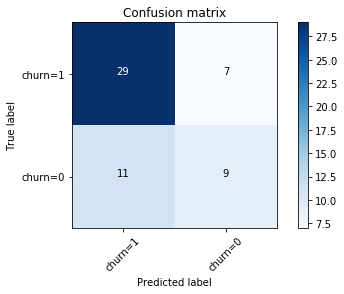

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test2, y2, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [33]:
#print the classification report
print (classification_report(y_test2, y2))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        20
           1       0.72      0.81      0.76        36

    accuracy                           0.68        56
   macro avg       0.64      0.63      0.63        56
weighted avg       0.67      0.68      0.67        56



In [34]:
#A few comments can be taken from the prediction model using decision trees. The first, is that using a decision
#tree model the accuracy is slightly higher than 71%, using the accuracy calculations and Jaccard similiarity
#gave an accuracy of 71%, which means that the model is not perfect and that fails to predict less than 29% of
#the times that is giving a prediction. To get a better view, a confusion matrix was done. The confusion matrix
#explained that the model is able to predict correctly when a rotation MESES(1) is "1" related, with a 
#recall of 0.77, meaining that 77% of the times that the model is predicting a 1 rotation car, the
#real data shows the same result. On the other hand, the model is able to predict when a ROTATION is
#0 related MESES(2), because it has a recall of 0.62, which means that 38% of the times that the model predicts
#a 2 rotation car type, is not correct, with a ver low performance. The overall performance shows a 71% of
#accuracy. This performance of the model can tells us that is a good model to describe the
#rotation. To confirm if the model was not the most appropiate one, other models will be used and compared to the decision tree
#model.

In [35]:
#LOGISTIC REGRESSION MODEL
#import library
from sklearn.linear_model import LogisticRegression

#make a new column, making the complaint ytpe as numerical category, define "heat/hot water" category as 1
df['boolComp']=df['MESES']== 1
df['boolComp']=1*df['boolComp']



In [36]:
#define X (independent) variables
X=np.asarray(x)

#define Y (dependant) variable
Y=np.asarray(df['boolComp'])

In [37]:
#normalize the dataset
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-8.55e-01, -1.38e+00,  1.07e+00, -2.64e-01, -1.12e+00, -1.05e+00,
        -1.09e+00, -1.65e-01, -2.74e-03, -4.62e-01,  1.99e+00, -1.73e-01,
        -8.54e-02, -8.54e-02, -6.03e-02, -6.03e-02, -1.05e-01, -2.13e-01,
        -1.05e-01, -6.03e-02, -1.36e-01, -6.03e-02, -8.54e-02, -6.03e-02,
        -6.03e-02, -6.03e-02, -6.03e-02, -8.54e-02, -1.36e-01, -2.13e-01,
        -6.03e-02, -6.03e-02, -6.03e-02, -1.21e-01, -6.03e-02, -6.03e-02,
        -6.03e-02, -8.54e-02, -6.03e-02, -6.03e-02, -8.54e-02, -6.03e-02,
        -6.03e-02, -6.03e-02, -1.21e-01, -6.03e-02, -1.49e-01, -6.03e-02,
        -3.16e-01, -8.54e-02, -1.21e-01, -2.56e-01, -1.84e-01, -6.03e-02,
        -1.05e-01, -2.04e-01, -8.54e-02, -6.03e-02, -6.03e-02, -8.54e-02,
        -6.03e-02, -6.03e-02, -6.03e-02, -1.49e-01, -6.03e-02, -8.54e-02,
        -1.05e-01, -1.05e-01, -1.36e-01, -2.22e-01, -8.54e-02, -6.03e-02,
        -8.54e-02, -2.31e-01, -1.21e-01, -6.03e-02, -6.03e-02, -6.03e-02,
        -6.03e-02, -6.03e-02, -1.05e-0

In [38]:
#split the data into train (80%) and test(20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=4)
print('Train set: ',X_train.shape, y_train.shape)
print('Test set: ',X_test.shape, y_test.shape)

Train set:  (220, 144) (220,)
Test set:  (56, 144) (56,)


In [39]:
#import logistic regression and use liblinear numerical optimizer t find parameters
#use a C parameter of 0.01
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#now predict using the test set
yhat=LR.predict(X_test)

#predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability 
#of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

yhat_prob=LR.predict_proba(X_test)
yhat_prob.shape

(56, 2)

In [41]:
#check the accuracy of the model
print('logistic regression accuracy: ',metrics.accuracy_score(y_test,yhat))

logistic regression accuracy:  0.625


In [42]:
#Jaccard Index
jaccard_similarity_score(y_test,yhat)

C:\Users\djina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.625

Confusion matrix, without normalization
[[25 10]
 [11 10]]


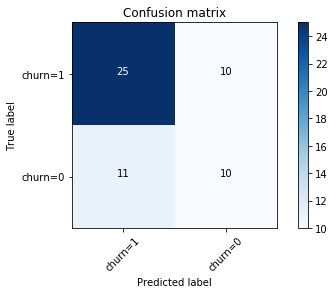

In [43]:
#compute the confusion matrix
cnf_matrix= confusion_matrix(y_test,yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [44]:
#print classification report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49        21
           1       0.69      0.71      0.70        35

    accuracy                           0.62        56
   macro avg       0.60      0.60      0.60        56
weighted avg       0.62      0.62      0.62        56



In [45]:
#logistic regression did not work proprly. This type of modelling was not able to predict a 1 rotation car
#type, and only produced 1 rotation car types. The model even that it had a 56% of accuracy, is 
#not good enough.

In [46]:
#K-NEAREST METHOD

#select independent variables 
x2=x.values

#dependant variable will be the same as in logistic regression
Y[0:5]

#standardize the data, using standardscaler
x2=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

#import train_test module, use 80% for train and 20% for testing
x_train, x_test, y_train, y_test=train_test_split(x2,Y,test_size=0.2,random_state=4)

In [47]:
#import k-neaest neihgbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [48]:
#train with k=1
k=16
#train the model and predict
neighbor= KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

#predict the model
yhat1=neighbor.predict(x_test)

#evaluate the accuracy 
print("K-nearest k=1 Accuracy: ", metrics.accuracy_score(y_test, yhat1))

K-nearest k=1 Accuracy:  0.7321428571428571


In [49]:
#Different amount of k can be used to enhance the accuracy of the model. a k will be used up to the number of 10
#to verify how much the accuracy changes

#final amount of k
Ks=30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neighbor = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neighbor.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.48, 0.38, 0.59, 0.55, 0.61, 0.59, 0.64, 0.64, 0.68, 0.68, 0.64,
       0.64, 0.66, 0.71, 0.7 , 0.73, 0.7 , 0.73, 0.7 , 0.7 , 0.7 , 0.7 ,
       0.64, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62])

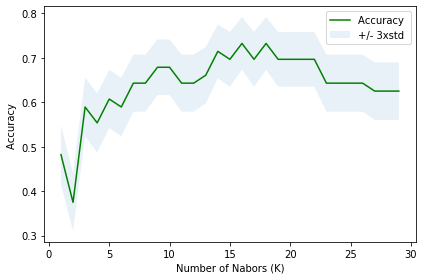

In [50]:
#plot the model
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [51]:
#By usiing a different amount of neighbors the accuracy of the model increased up to 69%, which is almost 6% 
#lower than the performance of the decision tree and 13% better than the logistic regression perfomance. Either way, it seems
#that the building characteristics that were chosen to make the model were not very accurate, as the performance
#of the model was not as good as expected, as several classification techniques were tested, and all presented
#an acurracy that ranges between 56 and 75%. We use a model with all
#the selected cars characteristics.